In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import confusion_matrix, classification_report


In [7]:
data=pd.read_csv('Resources/prepared_data1.csv')
data.fillna(' ',inplace=True)
data.head()

,Body,Label
0,save life insurance spend life quote saving en...,1
1,fight risk cancer http www adclick w p cfm pk ...,1
2,fight risk cancer http www adclick w p cfm pk ...,1
3,adult club offer free membership instant acces...,1
4,thought might like slim guaranteed lose lb day...,1


In [8]:

vectorizer=CountVectorizer()

X=data['Body']
y=data['Label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)



In [10]:

clf=MultinomialNB()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))

[[762   3]
 [ 17 277]]


In [12]:

report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       765
           1       0.99      0.94      0.97       294

    accuracy                           0.98      1059
   macro avg       0.98      0.97      0.98      1059
weighted avg       0.98      0.98      0.98      1059



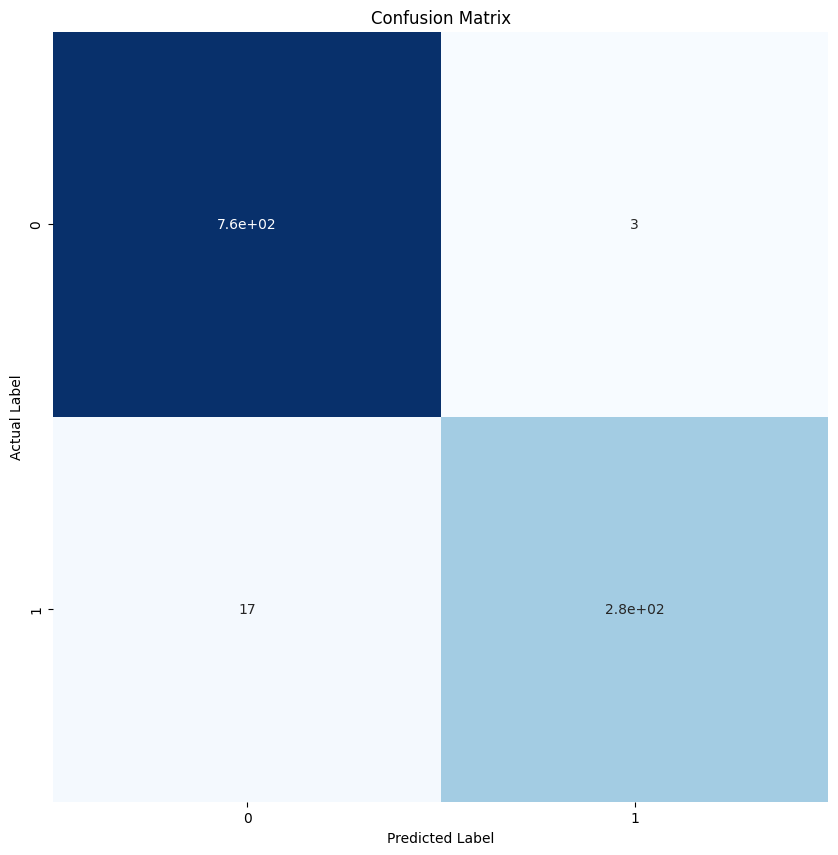

In [13]:
plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
sns.heatmap(matrix,annot=True,cmap='Blues',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('matrix.png',dpi=400,bbox_inches='tight')

In [ ]:
import joblib

# Saving the Model using joblib
joblib.dump(clf,'Resources/mymodel.pkl')

# saving the tfidf vectorizer using joblib
joblib.dump(vectorizer,'Resources/vectorizer.pkl')
